<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%A2%85%ED%95%A9%EC%9C%A0%ED%86%B5_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [2]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [3]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [4]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

In [5]:
sh = sh[sh['업종대분류'].str.contains('종합유통')]

In [6]:
sh

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
319,201903,강원,종합유통,다단계판매,다단계,0,0,0,0,0,0,0
320,201903,강원,종합유통,마트/슈퍼마켓,대형마트,0,0,26,11517812000,236962,442992766,48606
321,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 기업형,0,0,30,1177091000,59052,39236373,19933
322,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,7,10,1144,9315398000,495263,8142830,18809
323,201903,강원,종합유통,면세점,면세점,0,0,2,17839000,222,8919655,80357
...,...,...,...,...,...,...,...,...,...,...,...,...
23886,202009,충북,종합유통,전용매장,보훈매장,0,0,1,386000,40,386300,9658
23887,202009,충북,종합유통,전용매장,복지매점,0,0,5,2199000,415,439877,5300
23888,202009,충북,종합유통,전용매장,사원전용매장,0,0,10,82163000,3971,8216280,20691
23889,202009,충북,종합유통,전용매장,연금매장,0,0,3,36451000,1602,12150400,22754


In [7]:
group = sh.groupby(by='업종중분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종중분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,다단계판매,0,6,166,68535712000,415764,3440037895,9503086
1,마트/슈퍼마켓,951,1597,129394,3182073478000,128947589,30874076255,6425078
2,면세점,1,3,244,69964223000,637961,5498045789,10496464
3,백화점,16,13,1394,855398800000,11691087,34990277028,5589468
4,수입품,4,5,801,1311856000,22095,70468959,4027765
5,아울렛,2,3,392,309930292000,4999965,40272590748,4503586
6,온라인,577,60,13920,7597573667000,151774563,33520709158,7180724
7,전용매장,0,11,1891,58480890000,3784686,13266038688,5587615
8,편의점,3556,2547,190084,977499061000,143493925,317167177,521978


In [8]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [9]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [10]:
vcols = ['매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']

In [11]:
# 표준화 수행
cls = group[vcols]
cols = cls.columns
scaler = RobustScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[-9.07746895e-02, -2.65571302e-01, -3.57276463e-02,
         2.41988787e-01,  2.17511188e+00],
       [ 9.46185689e+00,  3.15980088e+00,  9.66004079e-01,
        -5.02956968e-01, -7.15543732e-01],
       [-8.50088705e-02, -2.63999719e-01, -3.39959212e-02,
         0.00000000e+00,  1.03724556e+00],
       [ 0.00000000e+00,  6.00099562e-01,  5.21482456e-02,
         6.27175225e-01,  2.84456268e-01],
       [-4.38350089e-02, -3.39527921e-01, -3.87957636e-02,
        -5.46997427e-01,  0.00000000e+00],
       [-7.40685985e-02,  0.00000000e+00,  0.00000000e+00,
         9.66787516e-01,  5.38885108e-02],
       [ 9.25931402e-01,  8.01753270e+00,  1.14390947e+00,
         4.97043032e-01, -1.92105426e-01],
       [ 3.67386162e-02, -2.76633158e-01, -9.47145603e-03,
        -4.90804910e-01, -9.05813690e-01],
       [ 1.39481076e+01,  7.34428698e-01,  1.07937309e+00,
        -5.40273300e-01, -1.08397781e+00]])

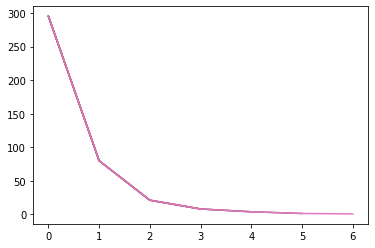

In [12]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 8):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [13]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=2)
km.fit(scaled)
km.cluster_centers_

array([[11.70498226,  1.94711479,  1.02268859, -0.52161513, -0.89976077],
       [ 0.09556898,  1.06741431,  0.15400956,  0.18502746,  0.35039759]])

In [14]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,11.704982,1.947115,1.022689,-0.521615,-0.899761
1,0.095569,1.067414,0.154010,0.185027,0.350398


In [15]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,0


In [16]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.090775,-0.265571,-0.035728,0.241989,2.175112
1,9.461857,3.159801,0.966004,-0.502957,-0.715544
2,-0.085009,-0.264000,-0.033996,0.000000,1.037246
3,0.000000,0.600100,0.052148,0.627175,0.284456
4,-0.043835,-0.339528,-0.038796,-0.546997,0.000000
5,-0.074069,0.000000,0.000000,0.966788,0.053889
6,0.925931,8.017533,1.143909,0.497043,-0.192105
7,0.036739,-0.276633,-0.009471,-0.490805,-0.905814
8,13.948108,0.734429,1.079373,-0.540273,-1.083978


In [17]:
names = pd.DataFrame(group['업종중분류'])
names.reset_index(inplace=True, drop=True)
names

,업종중분류
0,다단계판매
1,마트/슈퍼마켓
2,면세점
3,백화점
4,수입품
5,아울렛
6,온라인
7,전용매장
8,편의점


In [18]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종중분류,클러스터
0,-0.090775,-0.265571,-0.035728,0.241989,2.175112,다단계판매,1
1,9.461857,3.159801,0.966004,-0.502957,-0.715544,마트/슈퍼마켓,0
2,-0.085009,-0.264000,-0.033996,0.000000,1.037246,면세점,1
3,0.000000,0.600100,0.052148,0.627175,0.284456,백화점,1
4,-0.043835,-0.339528,-0.038796,-0.546997,0.000000,수입품,1
5,-0.074069,0.000000,0.000000,0.966788,0.053889,아울렛,1
6,0.925931,8.017533,1.143909,0.497043,-0.192105,온라인,1
7,0.036739,-0.276633,-0.009471,-0.490805,-0.905814,전용매장,1
8,13.948108,0.734429,1.079373,-0.540273,-1.083978,편의점,0


In [19]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수가 크지만 건당,점당매출은 작은 편의점 같은 산업들이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수는 작지만 건당,점당매출이 큰 유통, 전문서비스 등 음식을 제외한 산업이 해당된다.
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,11.704982,1.947115,1.022689,-0.521615,-0.899761
1,0.095569,1.067414,0.154010,0.185027,0.350398


In [20]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result['업종중분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='소매유통산업',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='고가유통산업',
      line_color=color[1]
  ))

  # fig.add_trace(go.Scatterpolar(
  #     r = cluster.values[2],
  #     theta = categories,
  #     fill='toself',
  #     name='Cluster2',
  #     line_color=color[2]
  # ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
# show_cluster(result, '편의점')

In [21]:
# StandardScaler, MinMaxScaler 사용 시 Outlier에 굉장히 민감함.
for col in sh['업종중분류'].unique():
  show_cluster(result, col)

0    1
Name: 클러스터, dtype: int32


1    0
Name: 클러스터, dtype: int32


2    1
Name: 클러스터, dtype: int32


3    1
Name: 클러스터, dtype: int32


4    1
Name: 클러스터, dtype: int32


5    1
Name: 클러스터, dtype: int32


6    1
Name: 클러스터, dtype: int32


7    1
Name: 클러스터, dtype: int32


8    0
Name: 클러스터, dtype: int32


In [22]:
sh[sh['업종대분류']=='기타']

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액


In [23]:
sh[sh['업종대분류']=='종합유통']

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
319,201903,강원,종합유통,다단계판매,다단계,0,0,0,0,0,0,0
320,201903,강원,종합유통,마트/슈퍼마켓,대형마트,0,0,26,11517812000,236962,442992766,48606
321,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 기업형,0,0,30,1177091000,59052,39236373,19933
322,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,7,10,1144,9315398000,495263,8142830,18809
323,201903,강원,종합유통,면세점,면세점,0,0,2,17839000,222,8919655,80357
...,...,...,...,...,...,...,...,...,...,...,...,...
23886,202009,충북,종합유통,전용매장,보훈매장,0,0,1,386000,40,386300,9658
23887,202009,충북,종합유통,전용매장,복지매점,0,0,5,2199000,415,439877,5300
23888,202009,충북,종합유통,전용매장,사원전용매장,0,0,10,82163000,3971,8216280,20691
23889,202009,충북,종합유통,전용매장,연금매장,0,0,3,36451000,1602,12150400,22754


In [24]:
a = sh[sh['업종대분류']=='종합유통']
a['업종중분류'].unique()

array(['다단계판매', '마트/슈퍼마켓', '면세점', '백화점', '수입품', '아울렛', '온라인', '전용매장',
       '편의점'], dtype=object)

In [27]:
b = sh[sh['업종중분류']=='온라인']
b['업종소분류'].unique()

array(['전자상거래', '홈쇼핑', '대형 이커머스 '], dtype=object)